# **CSA4020 - Deep Learning<br>Assignment - Classification**



# Dataset Used: MNIST



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

# Model 1: Simple Neural Network

In [2]:
(x, y), (X, Y) = tf.keras.datasets.mnist.load_data()

X_train = x
y_train = y
X_test = X
y_test = Y

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [4]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [7]:
history = model.fit(X_train, y_train, epochs=24, validation_data=(X_test,y_test))

Epoch 1/24
1875/1875 [==============================] - 16s 4ms/step - loss: 1.5433 - acc: 0.5832 - val_loss: 1.1405 - val_acc: 0.7393
Epoch 2/24
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0253 - acc: 0.7257 - val_loss: 0.9354 - val_acc: 0.7233
Epoch 3/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8823 - acc: 0.7488 - val_loss: 0.8897 - val_acc: 0.7345
Epoch 4/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8253 - acc: 0.7594 - val_loss: 0.8111 - val_acc: 0.7636
Epoch 5/24
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7941 - acc: 0.7596 - val_loss: 0.7216 - val_acc: 0.7901
Epoch 6/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7868 - acc: 0.7625 - val_loss: 0.7156 - val_acc: 0.7766
Epoch 7/24
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7544 - acc: 0.7743 - val_loss: 0.7214 - val_acc: 0.7856
Epoch 8/24
1875/1875 [==============================] - 6s 3m

313/313 [==============================] - 1s 1ms/step


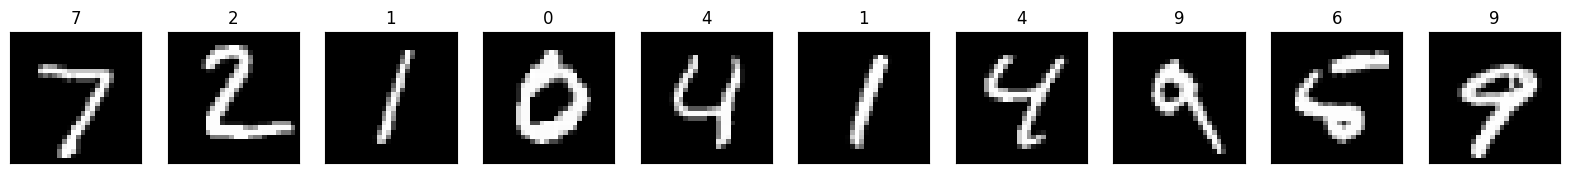

In [8]:
predictions = np.argmax(model.predict(X_test), axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))

for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [9]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6211 - acc: 0.8323


[0.6210894584655762, 0.8323000073432922]

In [10]:
acc1 = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

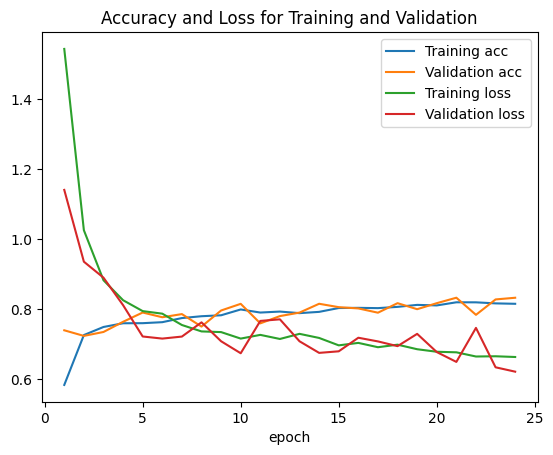

In [11]:
epochs = range(1, len(acc1) + 1)

plt.plot(epochs, acc1, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Accuracy and Loss for Training and Validation')
plt.xlabel('epoch')
plt.legend()

plt.show()

# Model 2: CNN

In [12]:
x_train = x
x_test = X
y_train = y
y_test = Y

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [13]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, epochs=24)

Epoch 1/24
1875/1875 [==============================] - 12s 3ms/step - loss: 0.2083 - accuracy: 0.9369
Epoch 2/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - accuracy: 0.9740
Epoch 3/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 4/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9856
Epoch 5/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9879
Epoch 6/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0306 - accuracy: 0.9895
Epoch 7/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 8/24
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 9/24
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0183 - accuracy: 0.9934
Epoch 10/24
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9822


[0.10204664617776871, 0.982200026512146]

313/313 [==============================] - 1s 1ms/step


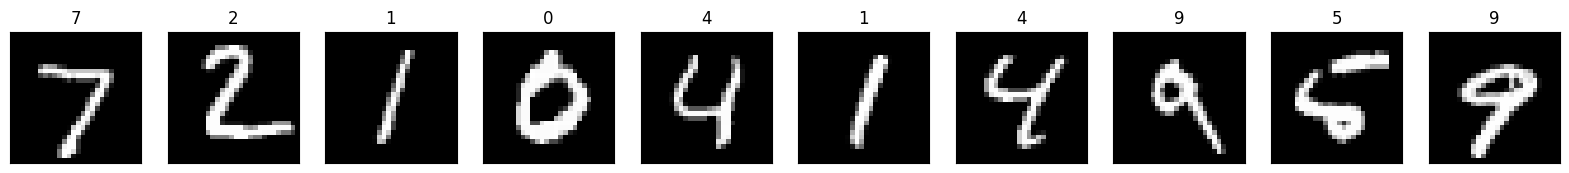

In [16]:
predictions = np.argmax(model.predict(x_test), axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))

for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [17]:
acc2 = history.history['accuracy']
loss = history.history['loss']

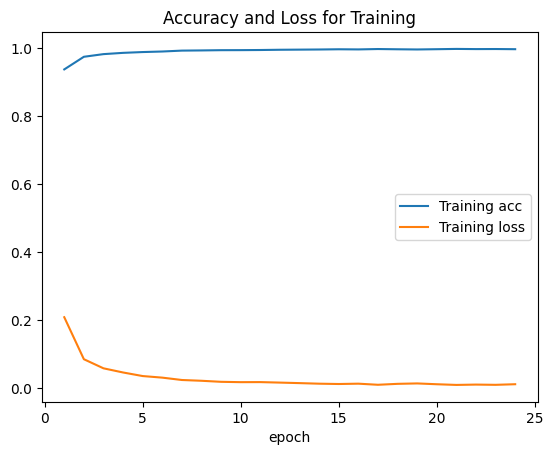

In [18]:
epochs = range(1, len(acc2) + 1)

plt.plot(epochs, acc2, label='Training acc')
plt.plot(epochs, loss, label='Training loss')
plt.title('Accuracy and Loss for Training')
plt.xlabel('epoch')
plt.legend()

plt.show()

# Model 3: Logistic Regression

In [19]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [20]:
EPOCH = 24               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate
DOWNLOAD_MNIST = False

In [21]:
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

100%|██████████| 9912422/9912422 [00:00<00:00, 92904748.83it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 43154860.64it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25608911.41it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8239848.08it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [22]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [23]:
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [24]:
class logisticRg(nn.Module):
    def __init__(self):
        super(logisticRg, self).__init__()
        self.lr = nn.Sequential(
            nn.Linear(28*28,10)
        )

    def forward(self, x):
        output = self.lr(x)
        return output, x    # return x for visualization


lor = logisticRg()
print(lor)  # net architecture

logisticRg(
  (lr): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)


In [25]:
optimizer = torch.optim.Adam(lor.parameters(), lr=LR)   # optimize all logistic parameters
loss_func = nn.CrossEntropyLoss() 

In [26]:
acc3 = []
l = []

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        # print(b_x.size())
        b_x = b_x.view(-1, 28*28)
        # print(b_x.size())

        output = lor(b_x)[0]               # logistic output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % BATCH_SIZE == 0:

            test_output, last_layer = lor(test_x.view(-1,28*28))
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
    acc3.append(accuracy)
    l.append(loss.data.numpy())
    print('Epoch: ', epoch + 1, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  1 | train loss: 0.5768 | test accuracy: 0.89
Epoch:  2 | train loss: 0.1404 | test accuracy: 0.89
Epoch:  3 | train loss: 0.3409 | test accuracy: 0.90
Epoch:  4 | train loss: 0.2683 | test accuracy: 0.90
Epoch:  5 | train loss: 0.1330 | test accuracy: 0.90
Epoch:  6 | train loss: 0.1350 | test accuracy: 0.90
Epoch:  7 | train loss: 0.1626 | test accuracy: 0.90
Epoch:  8 | train loss: 0.1396 | test accuracy: 0.91
Epoch:  9 | train loss: 0.1657 | test accuracy: 0.90
Epoch:  10 | train loss: 0.1547 | test accuracy: 0.91
Epoch:  11 | train loss: 0.1823 | test accuracy: 0.90
Epoch:  12 | train loss: 0.3694 | test accuracy: 0.91
Epoch:  13 | train loss: 0.3662 | test accuracy: 0.90
Epoch:  14 | train loss: 0.3485 | test accuracy: 0.91
Epoch:  15 | train loss: 0.2002 | test accuracy: 0.91
Epoch:  16 | train loss: 0.4143 | test accuracy: 0.91
Epoch:  17 | train loss: 0.0463 | test accuracy: 0.91
Epoch:  18 | train loss: 0.1958 | test accuracy: 0.90
Epoch:  19 | train loss: 0.1589 | tes

In [27]:
# print 10 predictions from test data
test_output, _ = lor(test_x[:10].view(-1,28*28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


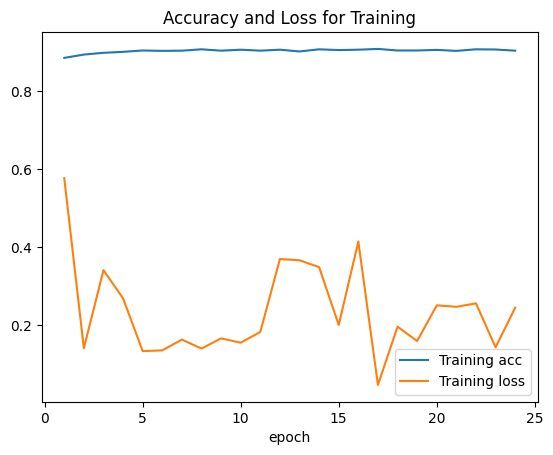

In [28]:
epochs = range(1, len(acc3) + 1)

plt.plot(epochs, acc3, label="Training acc")
plt.plot(epochs, l, label="Training loss")
plt.xlabel("epoch")
plt.title("Accuracy and Loss for Training")
plt.legend()
plt.show()

# Model 4: K-Nearest Neighbours

In [31]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [32]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=True,
)

In [33]:
# pick 2000 samples to speed up testing

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True)
train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor)[:60000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
train_y = train_data.train_labels[:60000]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [34]:
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

print(train_x.size(),train_y.size(),test_x.size(),test_y.size())

torch.Size([60000, 1, 28, 28]) torch.Size([60000]) torch.Size([2000, 1, 28, 28]) torch.Size([2000])


In [35]:
train_x = train_x.view(-1,28*28)
test_x = test_x.view(-1,28*28)

In [36]:
# K-Nearest Neighbor Classification

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np

In [37]:
trainData = np.array(train_x)
testData = np.array(test_x)
trainLabels = np.array(train_y)
testLabels = np.array(test_y)
valData = testData
valLabels = testLabels

In [38]:
# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 60000
validation data points: 2000
testing data points: 2000


In [39]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
acc4 = []

In [40]:
# loop over kVals
for k in range(1, 30, 2):
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    acc4.append(score)

k=1, accuracy=96.00%
k=3, accuracy=95.80%
k=5, accuracy=95.65%
k=7, accuracy=95.65%
k=9, accuracy=95.00%
k=11, accuracy=95.05%
k=13, accuracy=94.85%
k=15, accuracy=94.50%
k=17, accuracy=94.80%
k=19, accuracy=94.85%
k=21, accuracy=94.70%
k=23, accuracy=94.60%
k=25, accuracy=94.35%
k=27, accuracy=94.30%
k=29, accuracy=94.05%


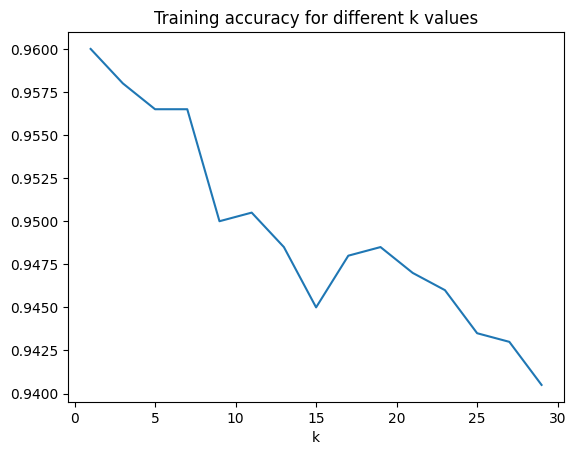

In [41]:
kVals = np.array([i for i in range(1, 30, 2)])

plt.plot(kVals, acc4)
plt.title("Training accuracy for different k values")
plt.xlabel("k")
plt.show()

In [42]:
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(acc4)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i], acc4[i] * 100))

k=1 achieved highest accuracy of 96.00% on validation data


In [43]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=1)

In [44]:
# Predict labels for the test set
predictions = model.predict(testData)

In [45]:
# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.97      0.99      0.98       234
           2       0.99      0.96      0.97       219
           3       0.94      0.96      0.95       207
           4       0.96      0.95      0.96       217
           5       0.93      0.96      0.95       179
           6       0.98      0.98      0.98       178
           7       0.94      0.94      0.94       205
           8       0.98      0.92      0.95       192
           9       0.94      0.94      0.94       194

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



# Model 5: Multi Layer Perceptron

In [46]:
# Hyper Parameters
EPOCH = 24            # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate

In [47]:
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=True,
)

In [48]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [49]:
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [50]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(28*28,28*28),
            nn.Linear(28*28,10)
        )

    def forward(self, x):
        output = self.mlp(x)
        return output, x    # return x for visualization


mlp = MLP()
print(mlp)  # net architecture

MLP(
  (mlp): Sequential(
    (0): Linear(in_features=784, out_features=784, bias=True)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)


In [51]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=LR)   # optimize all logistic parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [52]:
acc5 = []
l = []

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        # print(b_x.size())
        b_x = b_x.view(-1, 28*28)
        # print(b_x.size())

        output = mlp(b_x)[0]               # logistic output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % BATCH_SIZE == 0:

            test_output, last_layer = mlp(test_x.view(-1,28*28))
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
    acc5.append(accuracy)
    l.append(loss.data.numpy())
    print('Epoch: ', epoch + 1, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  1 | train loss: 0.1271 | test accuracy: 0.90
Epoch:  2 | train loss: 0.5547 | test accuracy: 0.89
Epoch:  3 | train loss: 0.2384 | test accuracy: 0.90
Epoch:  4 | train loss: 0.1121 | test accuracy: 0.89
Epoch:  5 | train loss: 0.2209 | test accuracy: 0.90
Epoch:  6 | train loss: 0.1815 | test accuracy: 0.90
Epoch:  7 | train loss: 0.2834 | test accuracy: 0.90
Epoch:  8 | train loss: 0.1785 | test accuracy: 0.90
Epoch:  9 | train loss: 0.5244 | test accuracy: 0.89
Epoch:  10 | train loss: 0.2059 | test accuracy: 0.90
Epoch:  11 | train loss: 0.4586 | test accuracy: 0.90
Epoch:  12 | train loss: 0.1847 | test accuracy: 0.90
Epoch:  13 | train loss: 0.3224 | test accuracy: 0.90
Epoch:  14 | train loss: 0.1116 | test accuracy: 0.89
Epoch:  15 | train loss: 0.3814 | test accuracy: 0.90
Epoch:  16 | train loss: 0.1413 | test accuracy: 0.90
Epoch:  17 | train loss: 0.3365 | test accuracy: 0.89
Epoch:  18 | train loss: 0.1905 | test accuracy: 0.90
Epoch:  19 | train loss: 0.3864 | tes

In [53]:
# print 10 predictions from test data
test_output, _ = mlp(test_x[:10].view(-1,28*28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


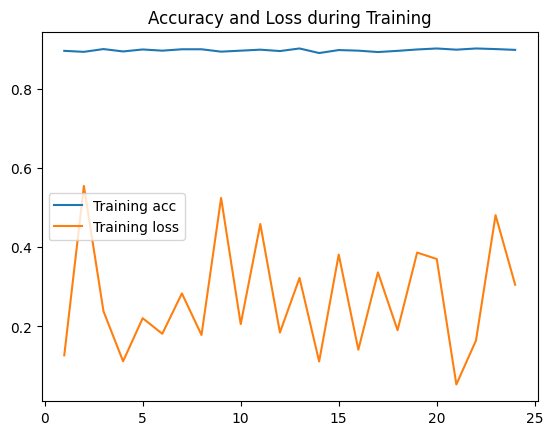

In [54]:
epochs = range(1, len(acc5) + 1)

plt.plot(epochs, acc5, label="Training acc")
plt.plot(epochs, l, label="Training loss")
plt.legend()
plt.title("Accuracy and Loss during Training")
plt.show()

# Model 6: Recurrent Neural Network

In [55]:
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [56]:
# Hyper Parameters
EPOCH = 24              # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [57]:
# Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

In [58]:
# Data Loader for easy mini-batch return in training
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [59]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(root='./mnist/', train=False, transform=transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array

In [60]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=1,           # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        return out

In [61]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [62]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [63]:
acc6 = []
l = []

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):        # gives batch data
        b_x = b_x.view(-1, 28, 28)              # reshape x to (batch, time_step, input_size)

        output = rnn(b_x)                               # rnn output
        loss = loss_func(output, b_y)                   # cross entropy loss
        optimizer.zero_grad()                           # clear gradients for this training step
        loss.backward()                                 # backpropagation, compute gradients
        optimizer.step()                                # apply gradients

        if step % BATCH_SIZE == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
    acc6.append(accuracy)
    l.append(loss.data.numpy())
    print('Epoch: ', epoch + 1, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  1 | train loss: 0.2433 | test accuracy: 0.94
Epoch:  2 | train loss: 0.0612 | test accuracy: 0.96
Epoch:  3 | train loss: 0.2354 | test accuracy: 0.96
Epoch:  4 | train loss: 0.2716 | test accuracy: 0.96
Epoch:  5 | train loss: 0.2359 | test accuracy: 0.97
Epoch:  6 | train loss: 0.1049 | test accuracy: 0.98
Epoch:  7 | train loss: 0.0439 | test accuracy: 0.96
Epoch:  8 | train loss: 0.0194 | test accuracy: 0.97
Epoch:  9 | train loss: 0.0050 | test accuracy: 0.97
Epoch:  10 | train loss: 0.0483 | test accuracy: 0.97
Epoch:  11 | train loss: 0.0449 | test accuracy: 0.98
Epoch:  12 | train loss: 0.0459 | test accuracy: 0.97
Epoch:  13 | train loss: 0.0577 | test accuracy: 0.96
Epoch:  14 | train loss: 0.0913 | test accuracy: 0.97
Epoch:  15 | train loss: 0.0137 | test accuracy: 0.97
Epoch:  16 | train loss: 0.0361 | test accuracy: 0.97
Epoch:  17 | train loss: 0.2605 | test accuracy: 0.97
Epoch:  18 | train loss: 0.0067 | test accuracy: 0.97
Epoch:  19 | train loss: 0.2294 | tes

In [64]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 4 8 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


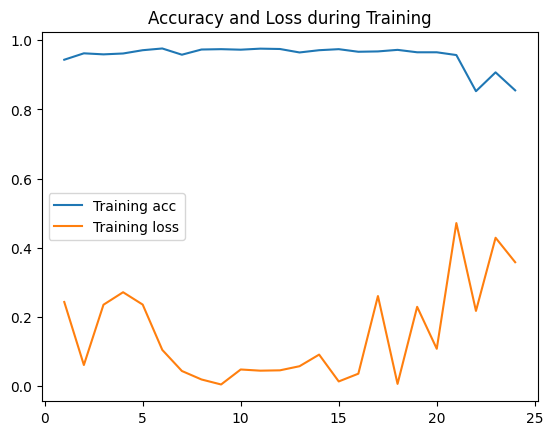

In [65]:
epochs = range(1, len(acc6) + 1)

plt.plot(epochs, acc6, label="Training acc")
plt.plot(epochs, l, label="Training loss")
plt.legend()
plt.title("Accuracy and Loss during Training")
plt.show()

# Model 7: Random Forest

In [66]:
import tensorflow as tf
(x, y), (X, Y) = tf.keras.datasets.mnist.load_data()

import numpy as np # linear algebra

In [67]:
import matplotlib.pyplot as plt  # Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
# To show graphs within the notebook
%matplotlib inline 

In [68]:
x = x.reshape(-1, 784)
X = X.reshape(-1, 784)
y = y.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, y_train, y_test = x, X, y, Y

In [69]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

<ipython-input-69-ab278fdae7aa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [70]:
pred = rf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matrix
[[ 970    0    0    0    0    4    2    1    3    0]
 [   0 1125    3    3    0    1    1    0    1    1]
 [   6    0  999    5    3    0    3    9    7    0]
 [   0    0   11  974    0    5    1    8  

# Comparing the Different Models

The following table shows the performance (accuracy) of each of the seven models.

|Model|Accuracy|Loss|Epochs|Learning Rate|Optimizer|Loss Function|
|---:|---:|---:|---:|---:|---:|---:|
|Simple NN|0.8323|0.6211|24|0.001|adam|categorical_crossentropy|
|Convolutional NN|0.9822|0.1020|24|0.001|adam|sparse_categorical_crossentropy|
|Logistic Regression|0.9000|0.2445|24|0.001|adam|crossentropy|
|K-Nearest Neighbours (k=1)|0.9600||||||
|Multi Layer Perceptron|0.9000|0.3052|24|0.001|adam|crossentropy|
|Recurrent NN|0.8500|0.3583|24|0.01|adam|crossentropy|
|Random Forest|0.9700